<a href="https://colab.research.google.com/github/Sivasankari-E/Machine-Learning/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [ ]:
import csv

# Sample data for the CSV file
data = [
    {"area": 1000, "price": 200000},
    {"area": 1200, "price": 250000},
    {"area": 1500, "price": 300000},
    {"area": 1800, "price": 350000},
    # Add more data rows as needed
]

# Specify the CSV file name
csv_file = "property_data.csv"

# Write the data to the CSV file
with open(csv_file, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=["area", "price"])
    writer.writeheader()
    for row in data:
        writer.writerow(row)

print(f"CSV file '{csv_file}' created with {len(data)} rows.")


CSV file 'property_data.csv' created with 4 rows.


In [ ]:
df = pd.read_csv('property_data.csv')
df

,area,price
0,1000,200000
1,1200,250000
2,1500,300000
3,1800,350000


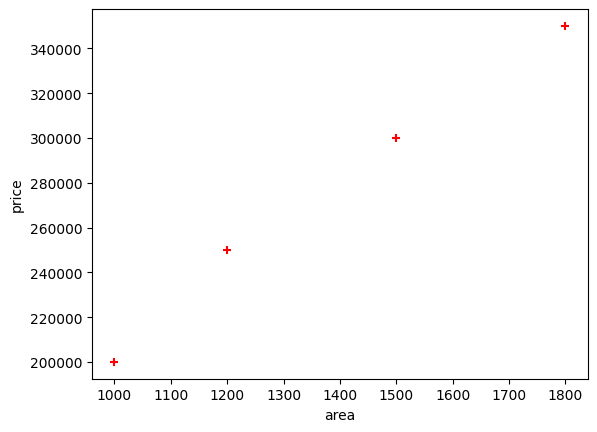

In [ ]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [ ]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,1000
1,1200
2,1500
3,1800


In [ ]:
price = df.price
price

0    200000
1    250000
2    300000
3    350000
Name: price, dtype: int64

In [ ]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [ ]:
reg.predict([[100]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([40816.32653061])

In [ ]:
reg.coef_ #cofficient m --slope

array([183.67346939])

In [ ]:
reg.intercept_ #intercept-- b

22448.979591836716

In [ ]:
#Y = m * X + b (m is coefficient and b is intercept)
100*183.67346939 + 22448.979591836716

40816.32653083671

In [ ]:
#Generate CSV file with list of home price predictions
data = [
    {"area": 1000,},
    {"area": 1200,},
    {"area": 1500,},
    {"area": 1800,},
    # Add more data rows as needed
]
csv_file = "areas.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=["area",])
    writer.writeheader()
    for row in data:
        writer.writerow(row)

print(f"CSV file '{csv_file}' created with {len(data)} rows.")

CSV file 'areas.csv' created with 4 rows.


In [ ]:
df = pd.read_csv('areas.csv')
df

,area
0,1000
1,1200
2,1500
3,1800


In [ ]:
area_df = pd.read_csv("areas.csv")
area_df.head(3)

,area
0,1000
1,1200
2,1500


In [ ]:
p = reg.predict(area_df)
p

array([206122.44897959, 242857.14285714, 297959.18367347, 353061.2244898 ])

In [ ]:
area_df['prices']=p
area_df

,area,prices
0,1000,206122.448980
1,1200,242857.142857
2,1500,297959.183673
3,1800,353061.224490


In [ ]:
area_df.to_csv("prediction.csv")

# Save Model To a File Using Python Pickle


In [ ]:
df = pd.read_csv('property_data.csv')
df

,area,price
0,1000,200000
1,1200,250000
2,1500,300000
3,1800,350000


In [ ]:
model = linear_model.LinearRegression()
model.fit(df[['area']],df.price)

LinearRegression()

In [ ]:
import pickle
with open('model_pickle','wb') as file:
    pickle.dump(model,file)

Load Saved Model

In [ ]:
with open('model_pickle','rb') as file:
    mp = pickle.load(file)

In [ ]:
mp.predict([[100]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([40816.32653061])

Save Trained Model Using joblib

joblib is best than pickle

In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.2.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? 

In [ ]:
from sklearn.externals import joblib


ImportError: ignored

In [ ]:
joblib.dump(model, 'model_joblib')

load saved model

In [ ]:
mj = joblib.load('model_joblib')

In [ ]:
mj.predict([[5000]])